# Traceability Code US

## Readme
**Objective**   
Provide an automated process for feature models synthesis using Formal Concept Analysis and Relationnal Concept Analysis by leveraging User-stories and code merges.
All the source code is available in a [Github repository](https://github.com/Hyrlos/CoNoConcepts_ThomasGEORGES_LIRMM)

**Inputs:**  
- Dataset extracted from Github or Gitlab:
  - User-stories title and request anwser
  - The user-stories related products
  - The user-stories related merges
  - The merges related changes
  - The changes related Files
  - The changes related Code Diff
  
**Outputs:**  
Two kind of feature representations:
- *Feature model*: a hierarchical diagram that visually illustrates the features, and their dependencies
- *Feature role model*: a feature model hierarchized by roles

**Process:**  
User-stories are used to identify the roles, features and create abstract features. They are the nodes and the leafs on the outputs models.  
The relations between the nodes and leafs are computed with FCA and RCA.

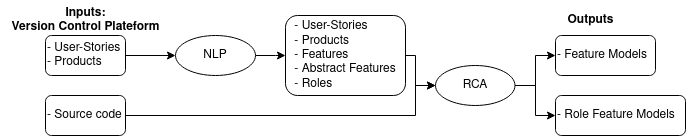

**Formal Concept Analysis:**  
Each object from Version Control System is represented with a Formal Context:   
- User-stories
- Products
- Roles
- Features
- Merges
- Changes
- Code diffs
- Files
- Abstract features

**Relationnal Concept Analysis**  
The relations between each objects are in their related Relationnal Concepts:  
- Products x User-stories  
- User-stories x Roles
- User-stories x Features
- Features x Abstract features
- User-stories x Merges
- Changes x Files
- Changes x Code diffs

**Tools:**
- [FCA4J](https://www.lirmm.fr/fca4j/Introduction.html) to perform Formal concept analysis
- [RCFT](https://www.lirmm.fr/fca4j/Family.html) file extension for FCA and RCA data representation
- [FeatureIDE](https://featureide.github.io/) for Feature Models vizualisation
- Elbows, Kmeans and Word2Vec for Clustering 

### Input:

| usID     | US                                                                                  |
|----------|--------------------------------------------------------------------------------------------|
| 1        | As a farmer , I can refresh the predicted weather                                          |
| 2        | As a farmer, I can CRUD plots                                                              |
| 3        | As a farmer with a plot, I can edit the parameters of a plot (current season)              |
| 4        | As a farmer with a plot, I can sort my plots in the list                                   |
| 5        | As a farmer with a plot, I can filter my plots in the list                                 |
| 6        | As a farmer with a plot, I can export observation data for a plot                          |
| 7        | As a farmer with a plot, I know when my plots will be in danger                            |
| 8        | As a farmer irrigator, I can manage my irrigations and recommendations in my favorite unit |
| 9        | As a farmer irrigator, I choose my preferred irrigation unit in my user-settings           |
| 10       | As a farmer irrigator, I can view my irrigation recommendations in my favorite unit        |
| 11       | As a admin, I can CRUD a farmer                                                            |
| 12       | As a admin, I can relaunch all failed simulation                                           |


### Outputs:
#### Feature Model:
![exampleFMCONO.png](https://raw.githubusercontent.com/Hyrlos/CoNoConcepts_ThomasGEORGES_LIRMM/master/exampleFMCONO.png)

#### Feature Role Model:
![exampleFRMCONO.png](https://raw.githubusercontent.com/Hyrlos/CoNoConcepts_ThomasGEORGES_LIRMM/master/exampleFRMCONO.png)

## For googleColab, git clone

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!apt-get install git

!git clone https://github.com/Hyrlos/CoNoConcepts_ThomasGEORGES_LIRMM.git
!cp -a CoNoConcepts_ThomasGEORGES_LIRMM/. /content

## Imports

In [1]:
import pandas as pd
import numpy as np
import json

pd.set_option('display.colheader_justify', 'center')
pd.options.display.max_colwidth = 100

In [2]:
# Customs
from ClusteringUtils import *
from BPP import * 

import nltk
nltk.download('punkt', quiet=True)


True

## Dataset

US_title 	US_data 	products 	MR_data 	nb_mr 	changes

In [3]:
df_complet = pd.read_csv("datasetUSExample.csv").drop("Unnamed: 0", axis=1)
df_complet[df_complet["nb_mr"] > 0].fillna("").dropna()
df_complet

,US_title,US_data,products,MR_data,nb_mr,changes
0,"As a farmer , I can refresh the predicted weather","[{""id"":1,""iid"":1,""project_id"":1,""title"":""As a farmer, I can refresh the predicted weather"",""labe...","[""Vine"",""Orchard""]","[{""id"": 1}]",1,"[{""id"":1,""changes"":[{""old_path"":""src/farmer"",""new_path"":""src/farmer"",""new_file"":""False"",""renamed..."
1,"As a farmer, I can CRUD plots","[{""id"":2,""iid"":2,""project_id"":1,""title"":""As a farmer, I can CRUD plots"",""labels"":[""Vine"",""Orchar...","[""Vine"",""Orchard"",""Almond""]","[{""id"": 2}]",1,"[{""id"":2,""changes"":[{""old_path"":""src/farmer"",""new_path"":""src/farmer"",""new_file"":""False"",""renamed..."
2,"As a farmer with a plot, I can edit the parameters of a plot (current season)","[{""id"":3,""iid"":3,""project_id"":1,""title"":""As a farmer with a plot, I can edit the parameters of a...","[""Vine"",""Orchard""]","[{""id"": 3}]",1,"[{""id"":3,""changes"":[{""old_path"":""src/farmer"",""new_path"":""src/farmer"",""new_file"":""False"",""renamed..."
3,"As a farmer with a plot, I can sort my plots in the list","[{""id"":4,""iid"":4,""project_id"":1,""title"":""As a farmer with a plot, I can sort my plots in the lis...","[""Orchard""]","[{""id"": 4}]",1,"[{""id"":4,""changes"":[{""old_path"":""src/plotList"",""new_path"":""src/plotList"",""new_file"":""False"",""ren..."
4,"As a farmer with a plot, I can filter my plots in the list","[{""id"":5,""iid"":5,""project_id"":1,""title"":""As a farmer with a plot, I can filter my plots in the l...","[""Orchard""]","[{""id"": 5}]",1,"[{""id"":5,""changes"":[{""old_path"":""src/plotList"",""new_path"":""src/plotList"",""new_file"":""True"",""rena..."
5,"As a farmer with a plot, I can export observation data for a plot","[{""id"":6,""iid"":6,""project_id"":1,""title"":""As a farmer with a plot, I can export observation data ...","[""Vine""]","[{""id"": 6}]",1,"[{""id"":6,""changes"":[{""old_path"":""src/export"",""new_path"":""src/export"",""new_file"":""True"",""renamed_..."
6,"As a farmer with a plot, I know when my plots will be in danger","[{""id"":7,""iid"":7,""project_id"":1,""title"":""As a farmer with a plot, I know when my plots will be i...","[""Vine"",""Orchard""]","[{""id"": 7}]",1,"[{""id"":7,""changes"":[{""old_path"":""src/danger"",""new_path"":""src/danger"",""new_file"":""True"",""renamed_..."
7,"As a farmer irrigator, I can manage my irrigations and recommendations in my favorite unit","[{""id"":8,""iid"":8,""project_id"":1,""title"":""As a farmer irrigator, I can manage my irrigations and ...","[""Almond""]","[{""id"": 8}]",1,"[{""id"":8,""changes"":[{""old_path"":""src/irrigation"",""new_path"":""src/irrigation"",""new_file"":""True"",""..."
8,"As a farmer irrigator, I choose my preferred irrigation unit in my user-settings","[{""id"":9,""iid"":9,""project_id"":1,""title"":""As a farmer irrigator, I choose my preferred irrigation...","[""Vine""]","[{""id"": 9}]",1,"[{""id"":9,""changes"":[{""old_path"":""src/irrigation"",""new_path"":""src/irrigation"",""new_file"":""False"",..."
9,"As a farmer irrigator, I can view my irrigation recommendations in my favorite unit","[{""id"":10,""iid"":10,""project_id"":1,""title"":""As a farmer irrigator, I can view my irrigation recom...","[""Vine"",""Almond""]","[{""id"": 10}]",1,"[{""id"":10,""changes"":[{""old_path"":""src/irrigation"",""new_path"":""src/irrigation"",""new_file"":""False""..."


## Formal Contexts

In [4]:
# Union between two list
def union(lst1, lst2):
    final_list = list(set(lst1) | set(lst2))
    return final_list

# role uniformisation
def uniformRoles(roles):
    roles = list(map(lambda x: x.replace('admin', 'administrator'), roles))
    return roles

# Cleaning role
def cleanRole(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace("As ", "")
    sentence = sentence.replace("as ", "")
    sentence = sentence.replace("a ", "")
    sentence = sentence.replace("an ", "")
    sentence = sentence.replace("( ", "")
    sentence = sentence.replace(") ", "")
    sentence = sentence.replace("'", "")
    sentence = sentence.replace(",", "")
    sentence = sentence.replace(" admin", "administrator")
    sentence = sentence.replace(" ", "")
    return sentence

# Cleaning Feature
def cleanFeature(sentence):
    sentence = sentence.replace("'", "")
    sentence = sentence.replace(",", "")
    sentence = sentence.replace("(", " ")
    sentence = sentence.replace(")", " ")
    sentence = sentence.replace("  ", " ")
    return sentence[1:]

### User-stories

In [5]:
df_US = pd.DataFrame(data={"US": df_complet["US_title"]})
df_US["US"] = df_US["US"].apply(lambda x: x.replace(",", ""))
df_US.to_csv("CSVs/ctxF_" + "userStories" + "_Example.csv")
df_US

,US
0,As a farmer I can refresh the predicted weather
1,As a farmer I can CRUD plots
2,As a farmer with a plot I can edit the parameters of a plot (current season)
3,As a farmer with a plot I can sort my plots in the list
4,As a farmer with a plot I can filter my plots in the list
5,As a farmer with a plot I can export observation data for a plot
6,As a farmer with a plot I know when my plots will be in danger
7,As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit
8,As a farmer irrigator I choose my preferred irrigation unit in my user-settings
9,As a farmer irrigator I can view my irrigation recommendations in my favorite unit


### Products

In [6]:
listproduits = df_complet["products"]
productPerUs = []
listTmp = []
for elem in listproduits:
    productPerUs.append(elem)
    for prod in elem[2:-2].replace("\"", "").split(","):
        listTmp = union(listTmp, [prod])
listproduits = listTmp

#  All products without duplicate
df_products = pd.DataFrame(data={"products": listproduits})
df_products.to_csv("CSVs/ctxF_" + "products" + "_Example.csv")
df_products

,products
0,Orchard
1,Vine
2,Almond


In [7]:
## [Product] per US
df_productsPerUS = pd.DataFrame(data={"products": productPerUs}).apply(lambda x : x.replace("\"",""))
df_productsPerUS

,products
0,"[""Vine"",""Orchard""]"
1,"[""Vine"",""Orchard"",""Almond""]"
2,"[""Vine"",""Orchard""]"
3,"[""Orchard""]"
4,"[""Orchard""]"
5,"[""Vine""]"
6,"[""Vine"",""Orchard""]"
7,"[""Almond""]"
8,"[""Vine""]"
9,"[""Vine"",""Almond""]"


### Roles

In [8]:
roleData = []
for us in df_complet["US_title"]:
    usSplit = us.split("I")
    roleData.append(cleanRole(usSplit[0]))
roleData = uniformRoles(roleData)


df_roles = pd.DataFrame(data={"roles": list(dict.fromkeys(roleData))})
df_roles.to_csv("CSVs/ctxF_" + "roles" + "_Example.csv")
df_roles

,roles
0,farmer
1,farmerwithplot
2,farmerirrigator
3,administrator


In [9]:
df_rolesPerUS = pd.DataFrame(data={"roles": roleData})
df_rolesPerUS

,roles
0,farmer
1,farmer
2,farmerwithplot
3,farmerwithplot
4,farmerwithplot
5,farmerwithplot
6,farmerwithplot
7,farmerirrigator
8,farmerirrigator
9,farmerirrigator


### Features

In [10]:
featureData = []
for us in df_complet["US_title"]:
    usSplit = us.split("I")
    featureData.append(cleanFeature(("JJ" + "j".join(usSplit[1:]))[2:]))
df_features = pd.DataFrame(data={"features": featureData})
df_features

,features
0,can refresh the predicted weather
1,can CRUD plots
2,can edit the parameters of a plot current season
3,can sort my plots in the list
4,can filter my plots in the list
5,can export observation data for a plot
6,know when my plots will be in danger
7,can manage my irrigations and recommendations in my favorite unit
8,choose my preferred irrigation unit in my user-settings
9,can view my irrigation recommendations in my favorite unit


In [11]:
len(list(dict.fromkeys(df_features["features"].tolist())))


df_featuresPerUS = pd.DataFrame(data={"features": list(dict.fromkeys(df_features["features"].tolist()))})
df_featuresPerUS.to_csv("CSVs/ctxF_" + "features" + "_Example.csv")
df_featuresPerUS

,features
0,can refresh the predicted weather
1,can CRUD plots
2,can edit the parameters of a plot current season
3,can sort my plots in the list
4,can filter my plots in the list
5,can export observation data for a plot
6,know when my plots will be in danger
7,can manage my irrigations and recommendations in my favorite unit
8,choose my preferred irrigation unit in my user-settings
9,can view my irrigation recommendations in my favorite unit


### Merges

In [12]:
mrList = []
usList = []
df_data = df_complet[df_complet["nb_mr"] > 0].fillna("").dropna()
for index, row in df_data.iterrows():
    for specMR in eval(row["MR_data"]):
            mrList.append(specMR["id"])
            usList.append(row["US_title"])

df_MRs = pd.DataFrame(data={"mrs":mrList})
df_MRs.to_csv("CSVs/ctxF_" + "mrs" + "_Example.csv")
df_MRs

,mrs
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [13]:
df_MRsPerUS = pd.DataFrame(data={"mrs":usList})
df_MRsPerUS

,mrs
0,"As a farmer , I can refresh the predicted weather"
1,"As a farmer, I can CRUD plots"
2,"As a farmer with a plot, I can edit the parameters of a plot (current season)"
3,"As a farmer with a plot, I can sort my plots in the list"
4,"As a farmer with a plot, I can filter my plots in the list"
5,"As a farmer with a plot, I can export observation data for a plot"
6,"As a farmer with a plot, I know when my plots will be in danger"
7,"As a farmer irrigator, I can manage my irrigations and recommendations in my favorite unit"
8,"As a farmer irrigator, I choose my preferred irrigation unit in my user-settings"
9,"As a farmer irrigator, I can view my irrigation recommendations in my favorite unit"


### Changes

In [14]:
hashChangesList = []
idMrList = []
for index,row in df_complet[df_complet["nb_mr"] > 0].fillna("").dropna().iterrows():
    for mr in eval(row["changes"]):
        listTmp = []
        for change in mr["changes"]:
            hashChangesList.append(hash(change["diff"]))
            listTmp.append(hash(change["diff"]))
        idMrList.append(listTmp)
            

df_changes = pd.DataFrame(data={"changes":hashChangesList})
df_changes.to_csv("CSVs/ctxF_" + "changes" + "_Example.csv")
df_changes

,changes
0,-1231036708525091317
1,1654117655041395405
2,-8140185372168949735
3,-7578569360430681020
4,-6210906903131101711
5,4653916694585383103
6,7626570432376237277
7,5456234796663781104
8,6858191971573673581
9,-1891152919143645387


In [15]:
df_changesPerMR = pd.DataFrame(data={"changes":idMrList})
df_changesPerMR

,changes
0,"[-1231036708525091317, 1654117655041395405]"
1,"[-8140185372168949735, -7578569360430681020]"
2,"[-6210906903131101711, 4653916694585383103]"
3,"[7626570432376237277, 5456234796663781104]"
4,"[6858191971573673581, -1891152919143645387]"
5,"[-3666159177389752702, -7228008791841010171]"
6,"[-3558488941656624916, 2915688842901959771]"
7,"[-228842093468664764, -1617327935411577901]"
8,"[-6101322863306403565, 5240010633308069961]"
9,"[-4035911635522489696, 3423575916162369124]"


### Files

In [16]:
filenamesList = []
filenamesListDuplicate = []
filenamesPerChanges = []
for row in df_complet[df_complet["nb_mr"] > 0].fillna("").dropna()["changes"]:
    for mr in eval(row):
        filenamesListDuplicateList = []
        for change in mr["changes"]:             
            filenamesList = union(filenamesList,[change["new_path"]])
            filenamesListDuplicateList.append(change["new_path"])
            filenamesPerChanges.append(change["new_path"])
        filenamesListDuplicate.append(filenamesListDuplicateList)

df_filenames = pd.DataFrame(data={"filenames":filenamesList})
df_filenamesPerMRs = pd.DataFrame(data={"filenames":filenamesListDuplicate})
df_filenamesPerChanges = pd.DataFrame(data={"filenames":filenamesPerChanges})
df_filenames.to_csv("CSVs/ctxF_" + "filenames" + "_Example.csv")
df_filenames

,filenames
0,src/user-settings
1,src/plot
2,src/admin
3,src/danger
4,src/recommendation
5,src/weather
6,src/export
7,src/farmer
8,src/plotList
9,src/irrigation


In [17]:
df_filenamesPerChanges

,filenames
0,src/farmer
1,src/weather
2,src/farmer
3,src/plot
4,src/farmer
5,src/plot
6,src/plotList
7,src/plot
8,src/plotList
9,src/plot


### Diff

In [18]:
editType = ["new_file",
           "renamed_file",
           "deleted_file", "edited_file"]
df_editTypes = pd.DataFrame(data={"editTypes":editType})
df_editTypes.to_csv("CSVs/ctxF_" + "editTypes" + "_Example.csv")
df_editTypes


,editTypes
0,new_file
1,renamed_file
2,deleted_file
3,edited_file


In [19]:
def getTypeEdit(isRenamed_file, isDeleted_file, isNew_file):
    if (isRenamed_file == str(True)):
        return "renamed_file"
    if (isDeleted_file == str(True)):
        return "deleted_file"
    if (isNew_file == str(True)):
        return "new_file"
    return "edited_file"

In [20]:
editType = []
for index,row in df_complet[df_complet["nb_mr"] > 0].fillna("").dropna().iterrows():
    for mr in eval(row["changes"]):
        for change in mr["changes"]:
            editType.append([getTypeEdit(change["renamed_file"], change["deleted_file"], change["new_file"])])

df_editTypesPerChanges = pd.DataFrame(data={"editTypes":editType})
df_editTypesPerChanges

,editTypes
0,[edited_file]
1,[new_file]
2,[edited_file]
3,[edited_file]
4,[edited_file]
5,[edited_file]
6,[edited_file]
7,[edited_file]
8,[new_file]
9,[edited_file]


### Clustering for Abstract features

In [21]:
import gensim.downloader as api

In [22]:
model = api.load('glove-wiki-gigaword-200')
#model = api.load('glove-wiki-gigaword-300')

In [23]:
from ClusteringUtils import *

# data is a dataframe of array
def ctxRelPerCtxForms(df_ctxFormX, data):

    tabRet = []
    for indexData, rowData in data.iterrows():
        tabContains = []
        
        for indexCtx, rowCtx in df_ctxFormX.iterrows():
            
            if rowCtx[0] in rowData[0]:
                tabContains.append("x")
            else:
                tabContains.append("")
        tabRet.append(tabContains)
    return tabRet

def clusterFeatures(model,features):    
    
    feature_vectors = [document_vector(model, feature) for feature in features]

    nbClusters= getOptimalClusterNumber(features, feature_vectors)
    
    if nbClusters > (len(features)/4)+2:
        nbClusters = int(len(features)/4)+2
    if nbClusters == 0:
        nbClusters = 1
    return getClusterNamed(model, features, nbClusters)
 
    
features2Roles = my_array = np.array(ctxRelPerCtxForms(df_roles, df_rolesPerUS))
df_features2Roles = pd.DataFrame(my_array, columns=df_roles["roles"], index=df_features["features"])
df_features2Roles


roles,farmer,farmerwithplot,farmerirrigator,administrator
features,,,,
can refresh the predicted weather,x,,,
can CRUD plots,x,,,
can edit the parameters of a plot current season,x,x,,
can sort my plots in the list,x,x,,
can filter my plots in the list,x,x,,
can export observation data for a plot,x,x,,
know when my plots will be in danger,x,x,,
can manage my irrigations and recommendations in my favorite unit,x,,x,
choose my preferred irrigation unit in my user-settings,x,,x,


In [24]:
df_features2Roles['roleCluster'] = df_features2Roles.apply(lambda row: min([col for col, val in row.items() if val == 'x'], key=len) if 'x' in row.values else '', axis=1)

featuresRoles = []
for role in df_roles["roles"].tolist():
    feat = df_features2Roles[df_features2Roles['roleCluster'] == role].index.tolist()
    if(len(feat)>0):
        featuresRoles.append(list(map(lambda x: x.split(" "), feat)))
featuresRoles                     
    
featuresPerClusters = []
for featuresPerRoles in featuresRoles:
    featuresPerClusters.append(clusterFeatures(model, featuresPerRoles))

Cluster  0
Cluster  1
Cluster  2
Cluster  3
Cluster  0


In [25]:
df_features2Roles

roles,farmer,farmerwithplot,farmerirrigator,administrator,roleCluster
features,,,,,
can refresh the predicted weather,x,,,,farmer
can CRUD plots,x,,,,farmer
can edit the parameters of a plot current season,x,x,,,farmer
can sort my plots in the list,x,x,,,farmer
can filter my plots in the list,x,x,,,farmer
can export observation data for a plot,x,x,,,farmer
know when my plots will be in danger,x,x,,,farmer
can manage my irrigations and recommendations in my favorite unit,x,,x,,farmer
choose my preferred irrigation unit in my user-settings,x,,x,,farmer


In [26]:
df_rolesFeaturesSuperF = pd.DataFrame()
df_rolesFeaturesSuperF["features"] = df_features["features"]
df_rolesFeaturesSuperF["clusters"] = ""
df_rolesFeaturesSuperF= df_rolesFeaturesSuperF.set_index('features')


for clusterNamed in featuresPerClusters:
    for cluster, features in clusterNamed:
        for feature in features:
            df_rolesFeaturesSuperF.loc[feature,"clusters"] = cluster 
        
df_rolesFeaturesSuperF[["clusters"]].sort_values(by=['clusters'])

,clusters
features,
can CRUD a farmer,crud farmer relaunch
can relaunch all failed simulation,crud farmer relaunch
can CRUD plots,crud plots
can edit the parameters of a plot current season,plots plot list
can sort my plots in the list,plots plot list
can filter my plots in the list,plots plot list
can export observation data for a plot,plots plot list
know when my plots will be in danger,plots plot list
can refresh the predicted weather,refresh predicted weather


In [27]:
df_clusters = df_rolesFeaturesSuperF[["clusters"]]
df_rolesFeaturesSuperF.sort_values(by=['clusters'])

,clusters
features,
can CRUD a farmer,crud farmer relaunch
can relaunch all failed simulation,crud farmer relaunch
can CRUD plots,crud plots
can edit the parameters of a plot current season,plots plot list
can sort my plots in the list,plots plot list
can filter my plots in the list,plots plot list
can export observation data for a plot,plots plot list
know when my plots will be in danger,plots plot list
can refresh the predicted weather,refresh predicted weather


In [28]:

df_clusters = pd.DataFrame(data={"clusters":list(dict.fromkeys(df_rolesFeaturesSuperF["clusters"].tolist()))})

df_clusters.to_csv("CSVs/ctxF_" + "AbstractFeature" + "_Example.csv")
df_clusters

,clusters
0,refresh predicted weather
1,crud plots
2,plots plot list
3,unit recommendations favorite
4,crud farmer relaunch


## Relational Contexts

### Product x UserStory : products2UserStories

In [29]:
products2UserStories = my_array = np.array(ctxRelPerCtxForms(df_products, df_productsPerUS))

In [30]:
df_products2UserStories = pd.DataFrame(my_array, columns=df_products["products"], index=df_US["US"])
df_products2UserStories.to_csv("CSVs/ctxR_" + "userStories2products" + "_Example.csv")
df_products2UserStories.transpose()

US,As a farmer I can refresh the predicted weather,As a farmer I can CRUD plots,As a farmer with a plot I can edit the parameters of a plot (current season),As a farmer with a plot I can sort my plots in the list,As a farmer with a plot I can filter my plots in the list,As a farmer with a plot I can export observation data for a plot,As a farmer with a plot I know when my plots will be in danger,As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,As a farmer irrigator I choose my preferred irrigation unit in my user-settings,As a farmer irrigator I can view my irrigation recommendations in my favorite unit,As a admin I can CRUD a farmer,As a admin I can relaunch all failed simulation
products,,,,,,,,,,,,
Orchard,x,x,x,x,x,,x,,,,x,x
Vine,x,x,x,,,x,x,,x,x,x,x
Almond,,x,,,,,,x,,x,,x


In [31]:
products2UserStories = my_array = np.array(ctxRelPerCtxForms(df_products, df_productsPerUS))

In [32]:
df_products2features = pd.DataFrame(my_array, columns=df_products["products"], index=df_features["features"])
df_products2features.to_csv("CSVs/ctxR_" + "products2features" + "_Example.csv")
df_products2features

products,Orchard,Vine,Almond
features,,,
can refresh the predicted weather,x,x,
can CRUD plots,x,x,x
can edit the parameters of a plot current season,x,x,
can sort my plots in the list,x,,
can filter my plots in the list,x,,
can export observation data for a plot,,x,
know when my plots will be in danger,x,x,
can manage my irrigations and recommendations in my favorite unit,,,x
choose my preferred irrigation unit in my user-settings,,x,


### US x Role : userStories2Roles

In [33]:
userStories2Roles = my_array = np.array(ctxRelPerCtxForms(df_roles, df_rolesPerUS))

In [34]:
df_userStories2Roles = pd.DataFrame(my_array, columns=df_roles["roles"], index=df_US["US"])
df_userStories2Roles.to_csv("CSVs/ctxR_" + "userStories2Roles" + "_Example.csv")
df_userStories2Roles

roles,farmer,farmerwithplot,farmerirrigator,administrator
US,,,,
As a farmer I can refresh the predicted weather,x,,,
As a farmer I can CRUD plots,x,,,
As a farmer with a plot I can edit the parameters of a plot (current season),x,x,,
As a farmer with a plot I can sort my plots in the list,x,x,,
As a farmer with a plot I can filter my plots in the list,x,x,,
As a farmer with a plot I can export observation data for a plot,x,x,,
As a farmer with a plot I know when my plots will be in danger,x,x,,
As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,x,,x,
As a farmer irrigator I choose my preferred irrigation unit in my user-settings,x,,x,


In [35]:
features2Roles = my_array = np.array(ctxRelPerCtxForms(df_roles, df_rolesPerUS))

In [36]:
features2Roles = pd.DataFrame(my_array, columns=df_roles["roles"], index=df_features["features"])
features2Roles.to_csv("CSVs/ctxR_" + "features2Roles" + "_Example.csv")
features2Roles

roles,farmer,farmerwithplot,farmerirrigator,administrator
features,,,,
can refresh the predicted weather,x,,,
can CRUD plots,x,,,
can edit the parameters of a plot current season,x,x,,
can sort my plots in the list,x,x,,
can filter my plots in the list,x,x,,
can export observation data for a plot,x,x,,
know when my plots will be in danger,x,x,,
can manage my irrigations and recommendations in my favorite unit,x,,x,
choose my preferred irrigation unit in my user-settings,x,,x,


### US x Feature : userStories2features

In [37]:
userStories2features = my_array = np.array(ctxRelPerCtxForms(df_features, df_featuresPerUS))

In [38]:
df_userStories2features = pd.DataFrame(my_array, columns=df_features["features"], index=df_US["US"])
df_userStories2features.to_csv("CSVs/ctxR_" + "userStories2features" + "_Example.csv")
df_userStories2features

features,can refresh the predicted weather,can CRUD plots,can edit the parameters of a plot current season,can sort my plots in the list,can filter my plots in the list,can export observation data for a plot,know when my plots will be in danger,can manage my irrigations and recommendations in my favorite unit,choose my preferred irrigation unit in my user-settings,can view my irrigation recommendations in my favorite unit,can CRUD a farmer,can relaunch all failed simulation
US,,,,,,,,,,,,
As a farmer I can refresh the predicted weather,x,,,,,,,,,,,
As a farmer I can CRUD plots,,x,,,,,,,,,,
As a farmer with a plot I can edit the parameters of a plot (current season),,,x,,,,,,,,,
As a farmer with a plot I can sort my plots in the list,,,,x,,,,,,,,
As a farmer with a plot I can filter my plots in the list,,,,,x,,,,,,,
As a farmer with a plot I can export observation data for a plot,,,,,,x,,,,,,
As a farmer with a plot I know when my plots will be in danger,,,,,,,x,,,,,
As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,,,,,,,,x,,,,
As a farmer irrigator I choose my preferred irrigation unit in my user-settings,,,,,,,,,x,,,


### Feature x AbstractF : features2AbstracFeatures

In [39]:
features2AbstracFeatures = my_array = np.array(ctxRelPerCtxForms(df_clusters, df_rolesFeaturesSuperF[["clusters"]]))

In [40]:
df_features2AbstracFeatures = pd.DataFrame(my_array, columns=df_clusters["clusters"], index=df_features["features"])
df_features2AbstracFeatures.to_csv("CSVs/ctxR_" + "features2AbstracFeatures" + "_Example.csv")
df_features2AbstracFeatures.transpose().sort_values(by="clusters").transpose()

clusters,crud farmer relaunch,crud plots,plots plot list,refresh predicted weather,unit recommendations favorite
features,,,,,
can refresh the predicted weather,,,,x,
can CRUD plots,,x,,,
can edit the parameters of a plot current season,,,x,,
can sort my plots in the list,,,x,,
can filter my plots in the list,,,x,,
can export observation data for a plot,,,x,,
know when my plots will be in danger,,,x,,
can manage my irrigations and recommendations in my favorite unit,,,,,x
choose my preferred irrigation unit in my user-settings,,,,,x


In [41]:
features2AbstracFeatures = my_array = np.array(ctxRelPerCtxForms(df_clusters, df_rolesFeaturesSuperF[["clusters"]]))

In [42]:
df_us2AbstracFeatures = pd.DataFrame(my_array, columns=df_clusters["clusters"], index=df_US["US"])
df_us2AbstracFeatures.to_csv("CSVs/ctxR_" + "us2AbstracFeatures" + "_Example.csv")
df_us2AbstracFeatures.transpose().sort_values(by="clusters").transpose()

clusters,crud farmer relaunch,crud plots,plots plot list,refresh predicted weather,unit recommendations favorite
US,,,,,
As a farmer I can refresh the predicted weather,,,,x,
As a farmer I can CRUD plots,,x,,,
As a farmer with a plot I can edit the parameters of a plot (current season),,,x,,
As a farmer with a plot I can sort my plots in the list,,,x,,
As a farmer with a plot I can filter my plots in the list,,,x,,
As a farmer with a plot I can export observation data for a plot,,,x,,
As a farmer with a plot I know when my plots will be in danger,,,x,,
As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,,,,,x
As a farmer irrigator I choose my preferred irrigation unit in my user-settings,,,,,x


### US x MR : df_userStories2mrs

In [43]:
userStories2mrs = my_array = np.array(ctxRelPerCtxForms(df_US, df_MRsPerUS))

In [44]:
df_userStories2mrs = pd.DataFrame(my_array, columns=df_US["US"], index=df_MRs["mrs"])
df_userStories2mrs.to_csv("CSVs/ctxR_" + "userStories2mrs" + "_Example.csv")
df_userStories2mrs = df_userStories2mrs.transpose()
df_userStories2mrs

mrs,1,2,3,4,5,6,7,8,9,10,11,12
US,,,,,,,,,,,,
As a farmer I can refresh the predicted weather,,,,,,,,,,,,
As a farmer I can CRUD plots,,,,,,,,,,,,
As a farmer with a plot I can edit the parameters of a plot (current season),,,,,,,,,,,,
As a farmer with a plot I can sort my plots in the list,,,,,,,,,,,,
As a farmer with a plot I can filter my plots in the list,,,,,,,,,,,,
As a farmer with a plot I can export observation data for a plot,,,,,,,,,,,,
As a farmer with a plot I know when my plots will be in danger,,,,,,,,,,,,
As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,,,,,,,,,,,,
As a farmer irrigator I choose my preferred irrigation unit in my user-settings,,,,,,,,,,,,


### MR x Change : mrs2changes

In [45]:
mrs2changes = my_array = np.array(ctxRelPerCtxForms(df_changes, df_changesPerMR))

In [46]:
df_mrs2changes = pd.DataFrame(my_array, columns=df_changes["changes"], index=df_MRs["mrs"])
df_mrs2changes.to_csv("CSVs/ctxR_" + "mrs2changes" + "_Example.csv")

df_mrs2changes

changes,-1231036708525091317,1654117655041395405,-8140185372168949735,-7578569360430681020,-6210906903131101711,4653916694585383103,7626570432376237277,5456234796663781104,6858191971573673581,-1891152919143645387,...,-228842093468664764,-1617327935411577901,-6101322863306403565,5240010633308069961,-4035911635522489696,3423575916162369124,7563477815011409743,2259364940370211402,-2116999223241342497,5543621051904433473
mrs,,,,,,,,,,,,,,,,,,,,,
1,x,x,,,,,,,,,...,,,,,,,,,,
2,,,x,x,,,,,,,...,,,,,,,,,,
3,,,,,x,x,,,,,...,,,,,,,,,,
4,,,,,,,x,x,,,...,,,,,,,,,,
5,,,,,,,,,x,x,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
7,,,,,,,,,,,...,,,,,,,,,,
8,,,,,,,,,,,...,x,x,,,,,,,,
9,,,,,,,,,,,...,,,x,x,,,,,,


### Change x File : changes2filenames

In [47]:
changes2filenames = my_array = np.array(ctxRelPerCtxForms(df_filenames, df_filenamesPerChanges))

In [48]:
df_changes2filenames = pd.DataFrame(my_array, columns=df_filenames["filenames"], index=df_changes["changes"])
df_changes2filenames.to_csv("CSVs/ctxR_" + "changes2filenames" + "_Example.csv")

df_changes2filenames.sort_values(by="changes")

filenames,src/user-settings,src/plot,src/admin,src/danger,src/recommendation,src/weather,src/export,src/farmer,src/plotList,src/irrigation,src/observation,src/alert
changes,,,,,,,,,,,,
-8140185372168949735,,,,,,,,x,,,,
-7578569360430681020,,x,,,,,,,,,,
-7228008791841010171,,,,,,,,,,,x,
-6210906903131101711,,,,,,,,x,,,,
-6101322863306403565,,,,,,,,,,x,,
-4035911635522489696,,,,,,,,,,x,,
-3666159177389752702,,,,,,,x,,,,,
-3558488941656624916,,,,x,,,,,,,,
-2116999223241342497,,,,,,x,,,,,,


### diff x changes : changes2diffs

In [49]:
changes2diffs = my_array = np.array(ctxRelPerCtxForms(df_editTypes, df_editTypesPerChanges))

In [50]:
df_changes2diffs = pd.DataFrame(my_array, columns=df_editTypes["editTypes"], index=df_changes["changes"])
df_changes2diffs.to_csv("CSVs/ctxR_" + "changes2diffs" + "_Example.csv")

df_changes2diffs

editTypes,new_file,renamed_file,deleted_file,edited_file
changes,,,,
-1231036708525091317,,,,x
1654117655041395405,x,,,
-8140185372168949735,,,,x
-7578569360430681020,,,,x
-6210906903131101711,,,,x
4653916694585383103,,,,x
7626570432376237277,,,,x
5456234796663781104,,,,x
6858191971573673581,x,,,


## RCFT
RCFT file format is used to represent Relational Context Family: https://www.lirmm.fr/fca4j/ImportwithFamily.html

In [51]:
## A set of fonction used to format contexts to RCFT

def matrixFromFCtx(df_formalCtx, title):
    my_array = np.array(ctxRelPerCtxForms(df_formalCtx, df_formalCtx))
    df_formalCtxMatrixed = pd.DataFrame(my_array, columns=df_formalCtx[title], index=df_formalCtx[title])
    return df_formalCtxMatrixed


def printFormatdfCxtFToRCFT(df, title):
    print("FormalContext " + title)
    print("||")
    for index, row in df.iterrows():
        print("|" + str(row[0]) + "|")
    print()


def printFormatdfCxtRToRCFT(df, title, source, target):
    print("RelationalContext " + title)
    columns = list(df.columns.values)
    print("source " + source)
    print("target " + target)
    print("scaling exist")
    strCol = "||"
    for column in columns:
        strCol += str(column) + "|"
    print(strCol)
    for index, row in df.iterrows():
        strtmp = "|" + str(index) + "|"
        for cell in row:
            strtmp += str(cell) + "|"
        print(strtmp)
    print()


def retFormatdfCxtFToRCFT(df, title):
    strRet = ""
    strRet += ("FormalContext " + title) + "\n"
    strRet += ("||") + "\n"
    for index, row in df.iterrows():
        strRet += ("|" + str(row[0]) + "|") + "\n"
    strRet += "\n"
    return strRet


def retFormatdfCxtRToRCFT(df, title, source, target):
    print(title, source, target)

    strRet = ""
    strRet += ("RelationalContext " + title) + "\n"
    columns = list(df.columns.values)
    strRet += ("source " + source) + "\n"
    strRet += ("target " + target) + "\n"
    strRet += ("scaling exist") + "\n"
    strCol = "||"
    for column in columns:
        strCol += str(column) + "|"
    strRet += (strCol) + "\n"
    for index, row in df.iterrows():
        strtmp = "|" + str(index) + "|"
        for cell in row:
            strtmp += str(cell) + "|"
        strRet += (strtmp) + "\n"
    strRet += "\n"
    return strRet


def retFormatdfCxtMatrixed(df, title):
    strRet = ""
    strRet += ("FormalContext " + title) + "\n"
    columns = list(df.columns.values)
    strCol = "||"
    for column in columns:
        strCol += str(column) + "|"
    strRet += (strCol) + "\n"
    for index, row in df.iterrows():
        strtmp = "|" + str(index) + "|"
        for cell in row:
            strtmp += str(cell) + "|"
        strRet += (strtmp) + "\n"
    strRet += "\n"
    return strRet



In [52]:

df_MRs["mrs"] = df_MRs["mrs"].apply(lambda x : str(x))
df_changes["changes"] = df_changes["changes"].apply(lambda x : str(x))

In [53]:
matrixFromFCtx(df_products,"products")

products,Orchard,Vine,Almond
products,,,
Orchard,x,,
Vine,,x,
Almond,,,x


### Contexts to RCFT

In [54]:
strRCTF = ""
#Formal Contexts
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_products,"products"),"products")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_US, "US"),"US")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_roles, "roles"),"roles")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_features, "features"),"features")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_MRs, "mrs"),"mrs")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_changes, "changes"),"changes")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_filenames, "filenames"),"filenames")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_editTypes, "editTypes"),"editTypes")
strRCTF += retFormatdfCxtMatrixed(matrixFromFCtx(df_clusters, "clusters"),"clusters")


In [55]:

#Relational Contexts
strRCTF += retFormatdfCxtRToRCFT(df_products2UserStories.transpose() , "products2UserStories", "products", "US")
strRCTF += retFormatdfCxtRToRCFT(df_userStories2Roles , "userStories2Roles", "US", "roles")                                 
strRCTF += retFormatdfCxtRToRCFT(df_userStories2features , "userStories2features", "US", "features")
strRCTF += retFormatdfCxtRToRCFT(df_features2AbstracFeatures , "features2AbstracFeatures", "features", "clusters")
strRCTF += retFormatdfCxtRToRCFT(df_userStories2mrs, "userStories2mrs", "US", "mrs")
strRCTF += retFormatdfCxtRToRCFT(df_mrs2changes , "mrs2changes", "mrs", "changes")
strRCTF += retFormatdfCxtRToRCFT(df_changes2filenames , "changes2filenames","changes", "filenames")
strRCTF += retFormatdfCxtRToRCFT(df_changes2diffs , "changes2diffs", "changes", "editTypes")

products2UserStories products US
userStories2Roles US roles
userStories2features US features
features2AbstracFeatures features clusters
userStories2mrs US mrs
mrs2changes mrs changes
changes2filenames changes filenames
changes2diffs changes editTypes


### FCA4J: RCFT to JSON

In [56]:
f = open("outputsRCFT/EXAMPLE_RCFT.rcft", "w")
f.write(strRCTF)
f.close()

In [57]:
import subprocess

bashCommand = "java -jar fca4j-cli-0.4.4.jar RCA outputsRCFT/EXAMPLE_RCFT.rcft -a ARES outputsRCFT/outputFCA4J -fe -fi"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

print("\nOutput: ", output.decode())


Output:  execute ARES
computing ctx products 3x3 .
ctx products computed.
computing ctx US 12x12 .
ctx US computed.
computing ctx roles 4x4 .
ctx roles computed.
computing ctx features 12x12 .
ctx features computed.
computing ctx mrs 12x12 .
ctx mrs computed.
computing ctx changes 24x24 .
ctx changes computed.
computing ctx filenames 12x12 .
ctx filenames computed.
computing ctx editTypes 4x4 .
ctx editTypes computed.
computing ctx clusters 5x5 .
ctx clusters computed.
products: step=1 nb.concepts=3 nb.attrib rel.=0

US: step=1 nb.concepts=12 nb.attrib rel.=0

roles: step=1 nb.concepts=4 nb.attrib rel.=0

features: step=1 nb.concepts=12 nb.attrib rel.=0

mrs: step=1 nb.concepts=12 nb.attrib rel.=0

changes: step=1 nb.concepts=24 nb.attrib rel.=0

filenames: step=1 nb.concepts=12 nb.attrib rel.=0

editTypes: step=1 nb.concepts=4 nb.attrib rel.=0

clusters: step=1 nb.concepts=5 nb.attrib rel.=0

time:72 ms

ctx products : 3 entities, 15 attributes
ctx US : 12 entities, 40 attributes
ctx

## RCA for Feature Model

**Génération of the the extended family (last contexts including the relational attributes).
HERMES is an algorithm which computes the AOC-poset. We can alternatively use here another algorithm, e.g. to compute the whole lattice.**  
java -jar ./fca4j-cli-light-0.4.4.jar RCA -e -ra -f RCFT EXAMPLE_RCFT.rcft result/ -a HERMES  

**Format in CEX**  
java -jar ./fca4j-cli-light-0.4.4.jar FAMILY -a EXPORT result/EXAMPLE_RCFTextended.rcft -n products -x CEX result/products_extended.cex  

**The next step is to compute the rules between attributes for each extended formal context. This is done using the RULEBASIS command.**  
java -jar ./fca4j-cli-light-0.4.4.jar RULEBASIS result/products_extended.cex -folder result/products_rules


In [58]:

bashCommand = "java -jar fca4j-cli-0.4.4.jar RCA -e -ra -f RCFT outputsRCFT/EXAMPLE_RCFTextended.rcft result/ -a HERMES "
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

print("\nOutput: ", output.decode())


Output:  java.lang.Exception: the specified family file path is not found: outputsRCFT/EXAMPLE_RCFTextended.rcft

Try "help rca" to get help on command syntax




In [59]:
bashCommand = "java -jar fca4j-cli-0.4.4.jar FAMILY -a EXPORT result/EXAMPLE_RCFTextended.rcft -n products -x CEX result/products_extended.cex"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

print("\nOutput: ", output.decode())


Output:  java.lang.Exception: the specified family file path is not found: result/EXAMPLE_RCFTextended.rcft

Try "help family" to get help on command syntax




In [60]:
bashCommand = "java -jar fca4j-cli-0.4.4.jar RULEBASIS result/products_extended.cex -folder result/products_rules"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

#print("\nOutput: ", output.decode())

In [61]:
supportRulesProducts = output.decode().split("\n")[2:-1]
for rule in supportRulesProducts:
    print(rule,"\n")

<3>  => exist_products2UserStories(As a farmer I can CRUD plots),exist_products2UserStories(As a admin I can relaunch all failed simulation),exist_products2UserStories(exist_userStories2Roles(farmer)),exist_products2UserStories(exist_userStories2Roles(administrator)) 

<2> exist_products2UserStories(As a farmer I can CRUD plots),exist_products2UserStories(As a admin I can relaunch all failed simulation),exist_products2UserStories(exist_userStories2Roles(farmerirrigator)),exist_products2UserStories(exist_userStories2Roles(farmer)),exist_products2UserStories(exist_userStories2Roles(administrator)) => exist_products2UserStories(As a farmer irrigator I can view my irrigation recommendations in my favorite unit) 

<2> exist_products2UserStories(As a farmer I can CRUD plots),exist_products2UserStories(As a admin I can relaunch all failed simulation),exist_products2UserStories(exist_userStories2Roles(farmerwithplot)),exist_products2UserStories(exist_userStories2Roles(farmer)),exist_products2U

In [62]:
import re

def get_deepest_content(s):
    pattern = r'\(([^()]*)\)'
    matches = re.findall(pattern, s)
    if matches:
        deepest_content = matches[-1]
    else:
        deepest_content = s
    return deepest_content


def cleanExist(implisList):
    cleanedImplis = []
    for imply in implisList:
        imply = imply.replace("\n","")
        cleanedImplis.append(get_deepest_content(imply))
    return cleanedImplis

def unique_strings(list_of_lists):
    return sorted(list(set([string for lst in list_of_lists for string in lst])))

def fillCtxRCA(df, row_list, col_list, value):
    for rowname in row_list:
        for colname in col_list:
            if df.loc[rowname][colname] != 2:
                df.loc[rowname][colname] = value
    return df

def getLogicperSupportLvl(df_emptyCol, ruleslist):
    premissesList = []
    implisList = []
    couplesListPremImp = []
    for row in ruleslist:
        implis = cleanExist(row.split("=>")[1].split(","))
        premisses = row.split("=>")[0]
        lvl = row.split("=>")[0][1:2]
        
        # if premisses are empty because they all are implies 
        if (lvl == str(len(df_emptyCol))):
            premisses = df_emptyCol.index.to_list()
            lvl = 2
        elif (lvl == str(0)):
            premisses = cleanExist(row.split("=>")[0][4:].split(","))
            implis = cleanExist(row.split("=>")[1].split(","))
            lvl = 0
        else: 
            premisses = (cleanExist(row.split("=>")[0][4:].split(",")))
            lvl = 1
            
            
        premissesList.append(premisses)
        implisList.append(implis)
        couplesListPremImp.append((lvl, premisses, implis)) 
    return couplesListPremImp

def relationnalCtxFromRCA(df_emptyCol, ruleslist):
    premissesList = []
    implisList = []
    couplesListPremImp = []
    for row in ruleslist:
        implis = cleanExist(row.split("=>")[1].split(","))
        premisses = row.split("=>")[0]
        lvl = row.split("=>")[0][1:2]
        
        # if premisses are empty because they all are implies 
        if (lvl == str(len(df_emptyCol))):
            premisses = df_emptyCol.index.to_list()
            lvl = 2
        elif (lvl == str(0)):
            premisses = []     #["toNegate"]+(cleanExist(row.split("=>")[0][4:].split(",")))
            implis = []        #cleanExist(row.split("=>")[1].split(","))
            lvl = -1
        else: 
            premisses = (cleanExist(row.split("=>")[0][4:].split(",")))
            lvl = 1
            
            
        premissesList.append(premisses)
        implisList.append(implis)
        couplesListPremImp.append((lvl, premisses, implis))    
            
    df_ctx = pd.DataFrame(index = unique_strings(premissesList), columns= unique_strings(implisList))#.fillna(0)
    #print("PREMISSES: ", df_ctx.head().index)
    #print("IMPLIES: ", df_ctx.data.columns)
    
    for lvl, premisses, implis in couplesListPremImp:
        df_ctx = fillCtxRCA(df_ctx, premisses, implis, lvl)
    return df_ctx.fillna(0)



In [63]:
df_RCA = df_products[["products"]].set_index("products")
df_logical = relationnalCtxFromRCA(df_RCA, supportRulesProducts)
df_logical


,Almond,Orchard,Vine,As a admin I can CRUD a farmer,As a admin I can relaunch all failed simulation,As a farmer I can refresh the predicted weather,As a farmer I can CRUD plots,As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,As a farmer irrigator I can view my irrigation recommendations in my favorite unit,As a farmer irrigator I choose my preferred irrigation unit in my user-settings,As a farmer with a plot I can export observation data for a plot,As a farmer with a plot I can filter my plots in the list,As a farmer with a plot I can sort my plots in the list,As a farmer with a plot I know when my plots will be in danger,administrator,current season,farmer,farmerirrigator,farmerwithplot
Almond,0,0,0,0,2,0,2,1,1,0,0,0,0,0,2,0,2,1,0
As a admin I can CRUD a farmer,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1
As a admin I can relaunch all failed simulation,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1
As a farmer I can refresh the predicted weather,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1
As a farmer I can CRUD plots,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,1
As a farmer irrigator I can manage my irrigations and recommendations in my favorite unit,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
As a farmer irrigator I can view my irrigation recommendations in my favorite unit,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
As a farmer irrigator I choose my preferred irrigation unit in my user-settings,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1
As a farmer with a plot I can export observation data for a plot,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,1
As a farmer with a plot I can filter my plots in the list,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1


### Rules

In [64]:
bashCommand = "java -jar  fca4j-cli-0.4.4.jar RULEBASIS result/products_extended.cex -folder result/features_rules"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()


supportRulesFeatures = output.decode().split("\n")[2:-1]
getLogicperSupportLvl(df_RCA, supportRulesFeatures)

[(2,
  ['Orchard', 'Vine', 'Almond'],
  ['As a farmer I can CRUD plots',
   'As a admin I can relaunch all failed simulation',
   'farmer',
   'administrator']),
 (1,
  ['As a farmer I can CRUD plots',
   'As a admin I can relaunch all failed simulation',
   'farmerirrigator',
   'farmer',
   'administrator'],
  ['As a farmer irrigator I can view my irrigation recommendations in my favorite unit']),
 (1,
  ['As a farmer I can CRUD plots',
   'As a admin I can relaunch all failed simulation',
   'farmerwithplot',
   'farmer',
   'administrator'],
  ['As a farmer  I can refresh the predicted weather',
   'current season',
   'As a farmer with a plot I know when my plots will be in danger',
   'As a admin I can CRUD a farmer']),
 (0,
  ['As a farmer I can CRUD plots',
   'As a admin I can relaunch all failed simulation',
   '9',
   'farmer',
   'administrator'],
  [' Almond',
   'Vine',
   'Orchard',
   'As a farmer  I can refresh the predicted weather',
   'current season',
   'As a farm

In [65]:
def apply_xor_ruleXML(strings):
    n = len(strings)
    if n == 1:
        return f'<var>{strings[0]}</var>'
    elif n == 2:
        return f'<not><eq><var>{strings[0]}</var><var>{strings[1]}</var></eq></not>'
    else:
        first = strings[0]
        second = strings[1]
        rest = strings[2:]
        sub_expr = apply_xor_ruleXML(rest)
        return f'<not><eq><var>{first}</var><not><eq><var>{second}</var>{sub_expr}</eq></not></eq></not>'


def apply_xor_rule(strings):
    n = len(strings)
    if n == 1:
        return strings[0]
    elif n == 2:
        return f'not ({strings[0]} iff {strings[1]})'
    else:
        first = strings[0]
        second = strings[1]
        rest = strings[2:]
        return apply_xor_rule([f'not ({first} iff not ({second} iff {apply_xor_rule(rest)}))'])

    
def apply_NotAandB_rule(rules):
    strAnd = "<not><conj>"
    for rule in rules:
        strAnd += "<var>"+ rule + "</var>"
    strAnd += "</conj></not>" 
    return strAnd
    
def cleanPremisslist(premiss, features, abstractF, df_USF):
    cleanedList = []
    for elem in premiss:
        

        #print(elem)
        if (elem in df_USF.index):
            df_f2usOneCol = df_USF.transpose()[[elem]]
            elem = df_f2usOneCol.index[df_f2usOneCol[elem] == "x"][0]
        if (elem in features or elem  in abstractF):
            cleanedList.append('"'+elem+'"')
    return cleanedList
    
featuresList = df_features["features"].tolist()
AbstractFList = df_clusters["clusters"].tolist()
crossTreeXor = []
for lvl, premisses, conclusion in getLogicperSupportLvl(df_RCA, supportRulesFeatures):
    if (lvl == 0):
        premisses  = cleanPremisslist(premisses, featuresList, AbstractFList,df_userStories2features)
        crossTreeXor.append(apply_NotAandB_rule(premisses))
        

for rule in crossTreeXor:
    print(rule.replace('"',""),"\n\n")

<not><conj><var>can CRUD plots</var><var>can relaunch all failed simulation</var></conj></not> 


<not><conj><var>can refresh the predicted weather</var><var>can CRUD plots</var><var>can sort my plots in the list</var><var>can filter my plots in the list</var><var>can export observation data for a plot</var><var>know when my plots will be in danger</var><var>choose my preferred irrigation unit in my user-settings</var><var>can view my irrigation recommendations in my favorite unit</var><var>can CRUD a farmer</var><var>can relaunch all failed simulation</var></conj></not> 


<not><conj><var>can refresh the predicted weather</var><var>can CRUD plots</var><var>can export observation data for a plot</var><var>know when my plots will be in danger</var><var>can manage my irrigations and recommendations in my favorite unit</var><var>choose my preferred irrigation unit in my user-settings</var><var>can view my irrigation recommendations in my favorite unit</var><var>can CRUD a farmer</var><var

In [66]:
def get_rows(df):
    min_zeros = df.apply(lambda x: sum(x == 0), axis=1).min()
    return df[df.apply(lambda x: sum(x == 0), axis=1) == min_zeros]


## FM synthesis
The XML generated could be used with featureIDE. It's represent a feature model and a role feature model

In [67]:
def FMformatXML(df_premissesconclusion, df_f2fa, crossTreeXor, title):
    properties = '\t<properties>\n \t\t<graphics key="legendautolayout" value="true"/>\n \t\t<graphics key="showshortnames" value="false"/>\n\t\t<graphics key="layout" value="vertical"/>\n\t\t<graphics key="showcollapsedconstraints" value="true"/>\n\t\t<graphics key="legendhidden" value="false"/>\n\t\t<graphics key="layoutalgorithm" value="4"/>\n\t</properties>\n'

    strfm=('<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<featureModel>\n')
    strfm+=(properties)
    strfm+=('<struct>\n')
    strfm+=('\t<and abstract="true" mandatory="true" name="'+title+'">\n')
    for column_name in df_f2fa.columns:
        if column_name != "":
            strfm+=('\t\t<and abstract="true" name="'+column_name+'">\n')
            for row_name in list(df_f2fa.loc[df_f2fa[column_name] == 'x'].index):
                try:
                    isMandatory = df_premissesconclusion.loc[row_name,column_name] == 2
                except KeyError:
                    #print(column_name, row_name)
                    isMandatory = False
                except AttributeError:
                    isMandatory = False

                strfm+=('\t\t\t<feature mandatory="' + str(isMandatory) +  '" name="'+row_name+'"/>\n')
        strfm+=('\t\t</and>\n')
    strfm+=('\t</and>\n</struct>\n')
    
    strfm+=('\t<constraints>\n')
    for rule in crossTreeXor:
        strfm+= "\t\t<rule>\n"
        strfm+= rule.replace('"',"") + "\n"
        strfm+= "\t\t</rule>\n"    
    strfm+= "\t</constraints>"
        
    strfm+=("</featureModel>\n")
    f = open("FMExample.txt", "w")
    f.write(strfm)
    f.close()
    return strfm

print(FMformatXML(df_logical, df_features2AbstracFeatures, crossTreeXor, "Example"))

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<featureModel>
	<properties>
 		<graphics key="legendautolayout" value="true"/>
 		<graphics key="showshortnames" value="false"/>
		<graphics key="layout" value="vertical"/>
		<graphics key="showcollapsedconstraints" value="true"/>
		<graphics key="legendhidden" value="false"/>
		<graphics key="layoutalgorithm" value="4"/>
	</properties>
<struct>
	<and abstract="true" mandatory="true" name="Example">
		<and abstract="true" name="refresh predicted weather">
			<feature mandatory="False" name="can refresh the predicted weather"/>
		</and>
		<and abstract="true" name="crud plots">
			<feature mandatory="False" name="can CRUD plots"/>
		</and>
		<and abstract="true" name="plots plot list">
			<feature mandatory="False" name="can edit the parameters of a plot current season "/>
			<feature mandatory="False" name="can sort my plots in the list"/>
			<feature mandatory="False" name="can filter my plots in the list"/>
			<feature mandatory

In [68]:
def metaFMformatXML(df_premissesconclusion, df_f2fa, df_rolesFeaturesCluster, crossTreeXor, title):
    properties = '\t<properties>\n \t\t<graphics key="legendautolayout" value="true"/>\n \t\t<graphics key="showshortnames" value="false"/>\n\t\t<graphics key="layout" value="vertical"/>\n\t\t<graphics key="showcollapsedconstraints" value="true"/>\n\t\t<graphics key="legendhidden" value="false"/>\n\t\t<graphics key="layoutalgorithm" value="4"/>\n\t</properties>\n'

    strfm=('<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<featureModel>\n')
    strfm+=(properties)
    strfm+=('<struct>\n')
    strfm+=('\t<and abstract="true" mandatory="true" name="'+title+'">\n')
    
    roles = list(dict.fromkeys(df_features2Roles["roleCluster"].tolist()))

    for role in roles:
        featsRoles = df_features2Roles[df_features2Roles['roleCluster'] == role].index.tolist()
        strfm+=('\t\t<and abstract="true" name="'+role+'">\n')
        for column_name in df_f2fa.loc[featsRoles].replace(r'^\s*$', np.nan, regex=True).dropna(axis=1, how='all').columns:
            if column_name != "":
                strfm+=('\t\t\t<and abstract="true" name="'+column_name+'">\n')
                for row_name in list(df_f2fa.loc[df_f2fa[column_name] == 'x'].index):
                    try:
                        isMandatory = df_premissesconclusion.loc[row_name,column_name] == 2
                    except KeyError:
                        isMandatory = False
                    except AttributeError:
                        isMandatory = False

                    strfm+=('\t\t\t\t<feature mandatory="' + str(isMandatory) +  '" name="'+row_name+'"/>\n')
            strfm+=('\t\t\t</and>\n')
        strfm+=('\t\t</and>\n')
    
    strfm+=('\t</and>\n</struct>\n')
    
    strfm+=('\t<constraints>\n')
    for rule in crossTreeXor:
        strfm+= "\t\t<rule>\n"
        strfm+= rule.replace('"',"") + "\n"
        strfm+= "\t\t</rule>\n"    
    strfm+= "\t</constraints>\n"
        
    strfm+=("</featureModel>\n")
    f = open("RoleFeatureModelExample.txt", "w")
    f.write(strfm)
    f.close()
    return strfm
print(metaFMformatXML(df_logical, df_features2AbstracFeatures, df_features2Roles, crossTreeXor, "RoleFeatureModelExample"))

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<featureModel>
	<properties>
 		<graphics key="legendautolayout" value="true"/>
 		<graphics key="showshortnames" value="false"/>
		<graphics key="layout" value="vertical"/>
		<graphics key="showcollapsedconstraints" value="true"/>
		<graphics key="legendhidden" value="false"/>
		<graphics key="layoutalgorithm" value="4"/>
	</properties>
<struct>
	<and abstract="true" mandatory="true" name="RoleFeatureModelExample">
		<and abstract="true" name="farmer">
			<and abstract="true" name="refresh predicted weather">
				<feature mandatory="False" name="can refresh the predicted weather"/>
			</and>
			<and abstract="true" name="crud plots">
				<feature mandatory="False" name="can CRUD plots"/>
			</and>
			<and abstract="true" name="plots plot list">
				<feature mandatory="False" name="can edit the parameters of a plot current season "/>
				<feature mandatory="False" name="can sort my plots in the list"/>
				<feature mandatory="False